**Importing the necessary things.**

In [75]:
# open cv for image processing and importing 
import cv2

# for linear algebra
import numpy as np

# for visualizing the images 
import matplotlib.pyplot as plt
%matplotlib inline

**We can now import the main DNN model files and there are two of them:**
* The .prototxt file(s) which define the model architecture (i.e., the layers themselves)
* The .caffemodel file which contains the weights for the actual layers

In [76]:
model_file = 'model/res10_300x300_ssd_iter_140000.caffemodel'
config_file = 'model/deploy.prototxt.txt'

# for the actual model
net = cv2.dnn.readNetFromCaffe(config_file, model_file)

**Now that we have the model we just have to make a function to make a rectangle where it detects a face.**

The steps we will follow are:
1. Take the image and make a copy of it.
2. Make a blob out of the image using cv2 function **blobFromImage** : this basically means that we pre-process the image and do some operations on it for it to be sent into the network. The things included in the setting the dimensions of the blob, normalizing it and some other things that are given as the arguments and are explained below:
    * the actual image itself.
    
    * resize : we resize the image to be `(300,300)` so that it is not too large.
    
    * scaleFactor : After we perform mean subtraction we can optionally scale our images by some factor. This value defaults to `1.0` (i.e., no scaling) but we can supply another value as well. 
    
    * size : Here we supply the spatial size that the Convolutional Neural Network expects. For most current state-of-the-art neural networks this is either `224×224`, `227×227`, or `299×299`.
    
    *  These are our mean subtraction values. They can be a 3-tuple of the RGB means.
    
    * swapRB : OpenCV assumes images are in BGR channel order; however, the `mean` value assumes we are using RGB order. To resolve this discrepancy we can swap the R and B channels in image  by setting this value to `True`. By default OpenCV performs this channel swapping for us.

3. Feed the blob to the network.
4. Now we get detections which is a 4-dimensional matrix which has for every face it detected some values and they are numberwise:
    * don't know
    * the current frame (this is relevant if it is being given multiple frames)
    * no. of detections (no. of faces it detected)
    * this is again a number of values in a single dimension:
        * class id
        * class score
        * confidence (how confident it is that it is detecting a face)
        * the actual dimensions of the bounding rectangle (x,y,w,h)
        
5. Now we loop through all the detections and do :
    * if the confidence is above a threshold, then:
        * scale the normalized bounding box dimensions to be bigger again.
        * make the bounding box on top of the image.
        * set the text above the box as the cofidence it has for that box.

In [77]:
def detect_face(img):
    
    face = img.copy()
    
    # the original dimensions of the frame
    (h, w) = face.shape[:2]
    
    # make the blob
    blob = cv2.dnn.blobFromImage(cv2.resize(face, (300, 300)), 1.0,
    (300, 300), (104.0, 177.0, 123.0))
    
    # feed it to the network
    net.setInput(blob)
    detections = net.forward()
    
    # loop over the detections
    for i in range(0, detections.shape[2]):
        
        # extract the confidence of the rectangle
        confidence = detections[0, 0, i, 2]
        
        # set the threshold for the minimum confidence
        if confidence > 0.5:
            
            # get the bounding box coordinates and scale them to fit the frame width
            box = detections[0,0,i,3:7] * np.array([w, h, w, h])
            (X, Y, width, height) = box.astype('int')
            
            # draw the bounding box on around the face
            cv2.rectangle(face, (X, Y), (width, height), (255,0,0), 2 )
            
            # get the position above the box
            y = Y - 10 if Y - 10 > 10 else Y + 10
            
            # make the confidence into a percentage value
            text = "{:.2f}%".format(confidence * 100)
            
            # put the confidence score above the rectange
            cv2.putText(face, text, (X, y),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
            
    return face

**Now we have all the things we need to detect the faces on any image. But we still need a function to do some more work for us.**

1. Since we are importing the image using cv2, we have to color correct it to be RGB as it is imported as BGR by default.
2. Show the original image on the left side of the 2 images.
3. Pass it to the detection function.
4. Show this new detected image to the right of the original image.

In [89]:
def img_face_detection(img):
    
    # color convert it
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    #make the images to be side by side in subplot
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
    
    # see the image
    ax[0].imshow(img)
    ax[0].title.set_text("Original")
    
    # pass it to the detection function
    result = detect_face(img)
    
    # visualize the resultant image
    ax[1].imshow(result)
    ax[1].title.set_text("Detected")



# The actual detection

We follow a few steps when detecting the face on a image.

1. Import the image using cv2 using the path to the image. 
2. Pass it to the function, and we are done.



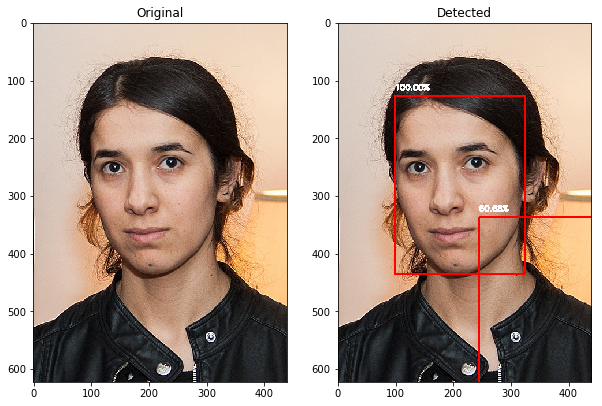

In [79]:
image = cv2.imread("sample images/1.jpg")
img_face_detection(image)

**It is showing a false positive down there but if we increase the confidence threshold to 70 or something that will be fixed.**

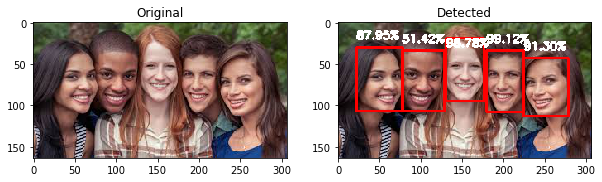

In [80]:
image = cv2.imread("sample images/2.jpg")
img_face_detection(image)

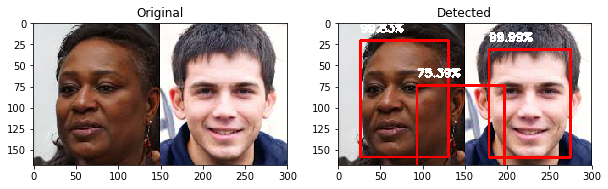

In [81]:
image = cv2.imread("sample images/3.jpg")
img_face_detection(image)

**It is detecting a false face there. Which is a false positive. This can be fixed using a higher confidence threshold value but that will mean that it will not detect a face if it is not sure of it.**

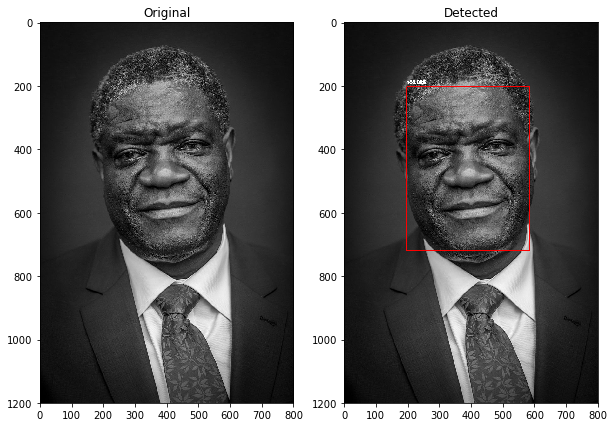

In [82]:
image = cv2.imread("sample images/4.jpg")
img_face_detection(image)

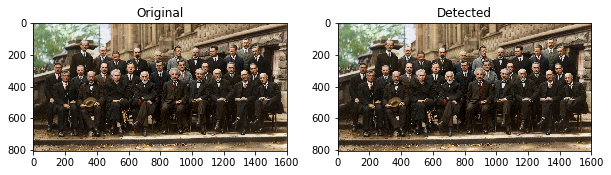

In [83]:
image = cv2.imread("sample images/5.jpg")
img_face_detection(image)

**Nothing is being detected here for some reason.**

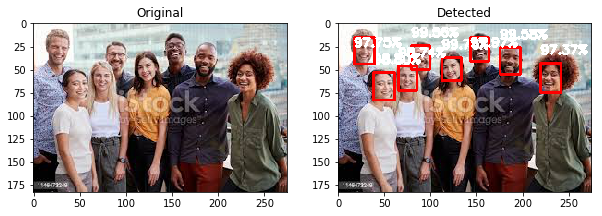

In [84]:
image = cv2.imread("sample images/6.jpg")
img_face_detection(image)

**This detected all the faces in the image unlike haarcascade which only detected 3.**

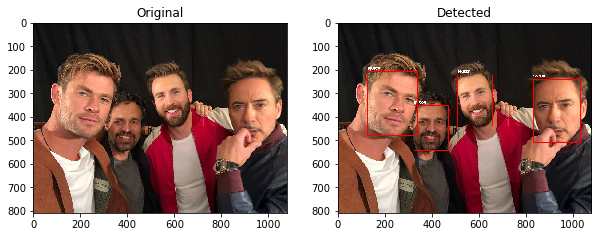

In [85]:
image = cv2.imread("sample images/7.jpg")
img_face_detection(image)

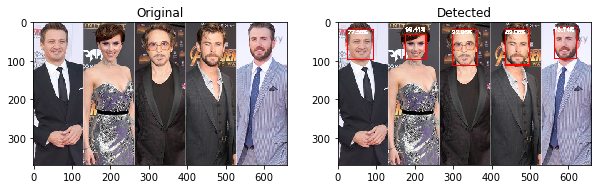

In [86]:
image = cv2.imread("sample images/8.jpg")
img_face_detection(image)

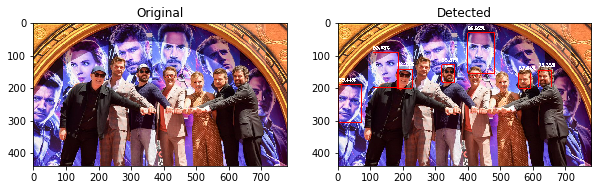

In [87]:
image = cv2.imread("sample images/9.jpg")
img_face_detection(image)

**It detects 3 faces from background and 4 faces from foreground which is better than what haar cascades did.**

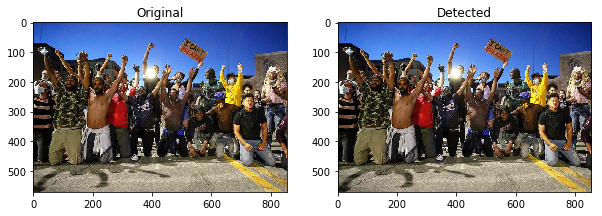

In [88]:
image = cv2.imread("sample images/Protests.jpg")
img_face_detection(image)

# Thank you.